# MNIST Dataset

### Use Scikit learn library to fetch dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [2]:
 X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
X[250]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [6]:
y[250]

'3'

## Display the data

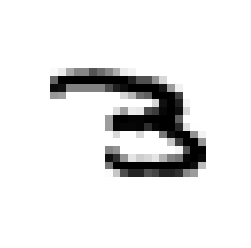

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def showImage(n):
    some_digit = X[n]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

showImage(250)

## Output to be predicted

In [8]:
y[250]

'3'

In [9]:
# Converting string to int

for i in range(0, len(y)): 
    y[i] = int(y[i]) 
y[250]

3

### Train & Test part

In [10]:
#Shuffling the data

import numpy as np
shuffle_index = np.random.permutation(70000)
X, y = X[shuffle_index], y[shuffle_index]

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
print ('X_train shape', X_train.shape)
print ('y_train shape', y_train.shape)
print ('X_test shape', X_test.shape)
print ('y_test shape', y_test.shape)

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


### Training a Multiclass Classifier

In [14]:
# Stochastic Gradient Descent (SGD) classifier
# capable of handling very large datasets efficiently & well suited for online learning

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
y_train = y_train.astype('int')
sgd_clf.fit(X_train, y_train)

C:\Users\Sivadinesh\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

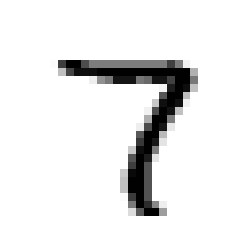

array([7])

In [47]:
k = 23
showImage(k)
sgd_clf.predict(X[k].reshape(1, -1))

### Check all scores

In [31]:
allScores = sgd_clf.decision_function(X[k].reshape(1, -1))
allScores

array([[-566539.14232613, -629395.30779755, -385826.47072605,
        -182827.78490815, -596993.24201348, -657315.97596443,
        -963814.68429845,  311013.41676115, -413005.7201681 ,
        -479059.69385317]])

In [32]:
np.argmax(allScores)

7

### Confusion Matrix

In [57]:
# training_score = sgd_clf.score(X_test, y_test)
# print("training_score: "+str(training_score))

y_pred= sgd_clf.predict(X_test)
y_test = y_test.astype(str).astype(int)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[ 940    0    3    8    2    3    2    4    4    0]
 [   0 1092    3    8    2    2    1    3   33    0]
 [   8    6  869   80   18    5   16   18   28    0]
 [   4    0   20  960    2    3    2   10   24    3]
 [   8    4    2   16  891    0   10    8   17    8]
 [  25   13    4  143   11  585    9   18   57   10]
 [  22    5   10    8    2   13  920    2   15    0]
 [   8    2   11   13   12    5    1 1002    6    9]
 [  24   19   17   85    7    8    4    7  747    5]
 [  11    8    2  103   80    8    0  117   31  626]]


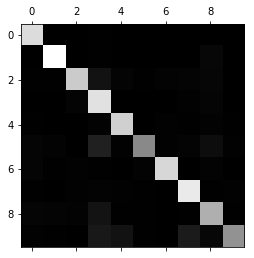

In [61]:
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

### Precision & Recall

In [59]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)

print("classification Report:")
print(cr)

classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       966
           1       0.95      0.95      0.95      1144
           2       0.92      0.83      0.87      1048
           3       0.67      0.93      0.78      1028
           4       0.87      0.92      0.90       964
           5       0.93      0.67      0.78       875
           6       0.95      0.92      0.94       997
           7       0.84      0.94      0.89      1069
           8       0.78      0.81      0.79       923
           9       0.95      0.63      0.76       986

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.88      0.86      0.86     10000
weighted avg       0.88      0.86      0.86     10000



## Multilabel classification

In [62]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

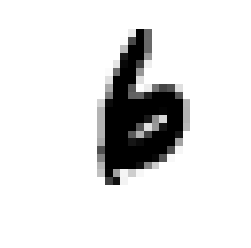

array([[False, False]], dtype=bool)

In [66]:
k = 14
showImage(k)
knn_clf.predict(X[k].reshape(1, -1))